In [38]:
import numpy as np
import urllib
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle
import requests
import tensorflowjs as tfjs
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import random

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [39]:
# Load the dataset from a local file
path = 'DataNumber/mnist.npz' 
with np.load(path, allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train'] #Training data
    x_test, y_test = f['x_test'], f['y_test'] #Test data

#shuffle the trainingdate and test data
random_number = random.randint(1, 100) #Random seed to shuffle data
x_train_shuffled, y_train_shuffled = shuffle(x_train, y_train, random_state=random_number)
x_test_shuffled, y_test_shuffled = shuffle(x_test, y_test, random_state=random_number)

In [60]:

# Check the shape of the dataset before small
print(f'Train: X={x_train_shuffled.shape}, y={y_train_shuffled.shape}')
print(f'Test: X={x_test_shuffled.shape}, y={y_test_shuffled.shape}')

#Pick out how many we want for test data and train data
#The test data is 20% of train data
trainDataSize = 5000 #How many images we want from the database per class
x_train =  x_train_shuffled[0:trainDataSize]
y_train =  y_train_shuffled[0:trainDataSize]
testSize = round(0.2*trainDataSize) #Here we can set how much test data in % we want compared to train data
x_test = x_test_shuffled[0:testSize]
y_test = y_test_shuffled[0:testSize]

#training data reshape
x_reshaped_training = np.reshape(x_train,(len(x_train),28,28,1)) #Create a matrix (nmbr, 28, 28, 1) For training data
x_train = x_reshaped_training.astype('float32')/255 #Convert to 0-1
#Test data
x_reshaped_test = np.reshape(x_test,(len(x_test),28,28,1)) #Create a matrix (nmbr, 28, 28, 1) For training data
x_test = x_reshaped_test.astype('float32')/255 #Convert to 0-1

print("\nHow big our training/test data is:")
print(f'Train: X={x_train.shape}, y={y_train.shape}')
print(f'Test: X={x_test.shape}, y={y_test.shape}')

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)

How big our training/test data is:
Train: X=(10000, 28, 28, 1), y=(10000,)
Test: X=(4000, 28, 28, 1), y=(4000,)


In [ ]:
# Print out some sample data
num_samples_to_print = 5  # Change this to however many samples you want to display

print("\nSample training data:")
for i in range(num_samples_to_print):
    print(f"Sample {i+1}: Image shape: {x_train[i].shape}, Label: {y_train[i]}")
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

print("\nSample test data:")
for i in range(num_samples_to_print):
    print(f"Sample {i+1}: Image shape: {x_test[i].shape}, Label: {y_test[i]}")
    plt.imshow(x_test[i], cmap='gray')
    plt.show()

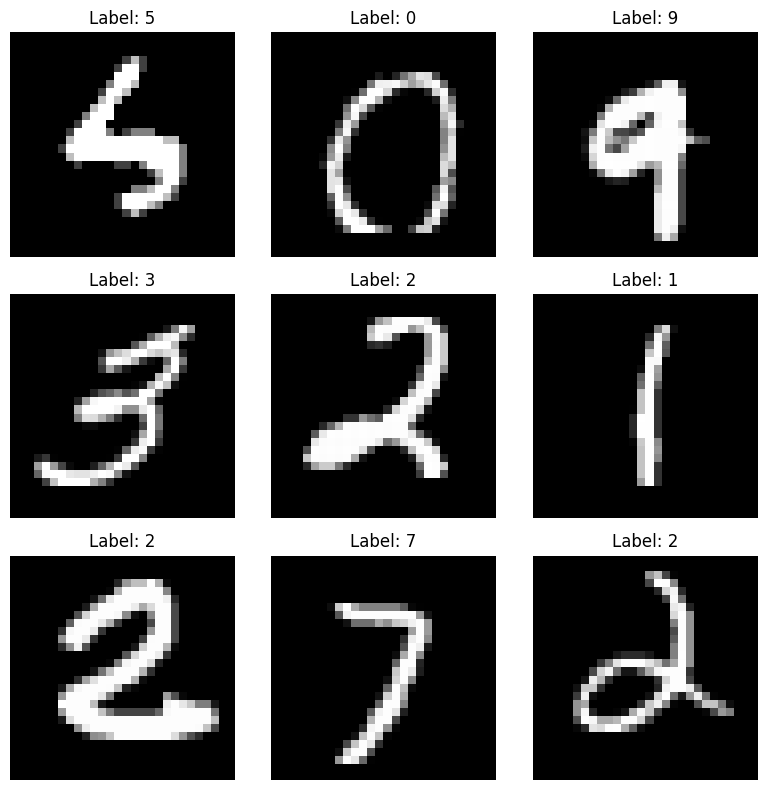

In [13]:
# Set the number of images to display (e.g., 9 images in a 3x3 grid)
num_images = 9
# Create a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Loop over the number of images and plot them
for i, ax in enumerate(axes.flat):
    if i < num_images:
        # Plot the image
        ax.imshow(x_train[i], cmap='gray') # we use - to make them with white background
        # Set the title as the corresponding label
        ax.set_title(f"Label: {y_train[i]}")
        # Turn off axis labels and ticks
        ax.axis('off')
# Adjust spacing between plots
plt.tight_layout()
plt.show()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 1, 1, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 1, 1, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,658 (545.54 KB)

 Trainable params: 139,082 (543.29 KB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7407 - loss: 0.8254 - val_accuracy: 0.1420 - val_loss: 4.5441
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9570 - loss: 0.1477 - val_accuracy: 0.9567 - val_loss: 0.1485
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9730 - loss: 0.0954 - val_accuracy: 0.9650 - val_loss: 0.1134
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9780 - loss: 0.0670 - val_accuracy: 0.9672 - val_loss: 0.1176
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9836 - loss: 0.0540 - val_accuracy: 0.9762 - val_loss: 0.0811
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9849 - loss: 0.0466 - val_accuracy: 0.9758 - val_loss: 0.0916
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9899 - loss: 0.0404 - val_accuracy: 0.9768 - val_loss: 0.0839
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9852 - loss: 0.0440 - val_accu

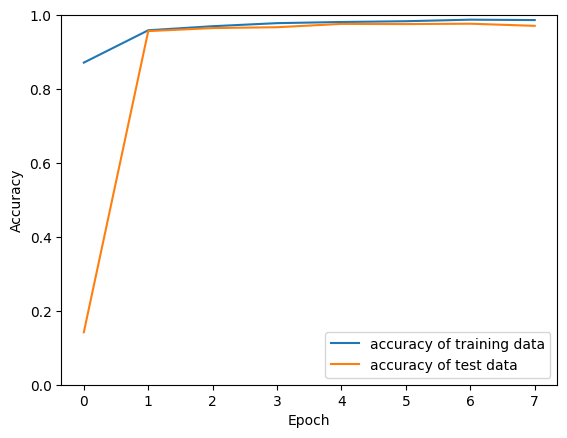

In [61]:
#Model
number_of_classes = 10
model = models.Sequential()

#-----------------------------------
# Define input shape with an explicit Input layer
model.add(layers.Input(shape=(28, 28, 1)))  # Input layer for grayscale images
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#-----------------------------------

#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (5, 5), activation='relu'))  # Added larger filter
model.add(layers.BatchNormalization())  # Added batch normalization

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Added a dense layer
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))  # Added dropout
model.add(layers.Dense(10, activation="softmax"))  # Number of classes in the last layer
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

label_encoder = LabelEncoder()
training_labels_encoded = label_encoder.fit_transform(y_train)
test_labels_encoded = label_encoder.transform(y_test)
training_labels_one_hot = to_categorical(training_labels_encoded, num_classes=number_of_classes)
test_labels_one_hot = to_categorical(test_labels_encoded, num_classes=number_of_classes)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, min_delta=0.1)  # Added early stopping
history = model.fit(x_train, training_labels_one_hot,
                    epochs=10, validation_data=(x_test, test_labels_one_hot),
                    callbacks=[early_stopping])

plt.plot(history.history['accuracy'], label='accuracy of training data')
plt.plot(history.history['val_accuracy'], label='accuracy of test data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  test_labels_one_hot, verbose=2)

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
correct_predictions = np.sum(predicted_classes == test_labels_encoded)
accuracy = correct_predictions / len(test_labels_encoded)
print(f"Manuell beräknad accuracy: {accuracy}")
print(tf.version.VERSION)


In [ ]:
k=0
for i in range(100):  # Loop
  '''if predicted_classes[i] == test_labels_encoded[i]:  # Check if the prediction is correct
    k=k+1
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Display the image in grayscale
    plt.title(f"Predicted: {label_encoder.inverse_transform([predicted_classes[i]])[0]}, Actual: {label_encoder.inverse_transform([test_labels_encoded[i]])[0]} OKE KKK: {k}")
    plt.show()'''
  if predicted_classes[i] != test_labels_encoded[i]:  # Check if the prediction is incorrect
    k=k+1
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Display the image in grayscale
    plt.title(f"Predicted: {label_encoder.inverse_transform([predicted_classes[i]])[0]}, Actual: {label_encoder.inverse_transform([test_labels_encoded[i]])[0]}")
    plt.show()

print(k)


In [51]:
model.save('NumberModel/model.h5')

In [ ]:
import matplotlib.pyplot as plt

k = 0
incorrect = 0
fig, axs = plt.subplots(2, 2, figsize=(6, 6))  # Create a 2x2 grid of subplots

for i in range(1000):  # Loop through 100 images
    if predicted_classes[i] != test_labels_encoded[i]:  # Check if the prediction is incorrect
        row = incorrect // 2  # Determine the row (0 or 1)
        col = incorrect % 2   # Determine the column (0 or 1)
        axs[row, col].imshow(x_test[i].reshape(28, 28), cmap='gray')  # Display the image in grayscale
        axs[row, col].set_title(f"Pred: {label_encoder.inverse_transform([predicted_classes[i]])[0]}, Act: {label_encoder.inverse_transform([test_labels_encoded[i]])[0]}")
        axs[row, col].axis('off')  # Hide axes for a cleaner display
        
        incorrect += 1  # Increment incorrect count

        if incorrect == 4:  # Once 4 images are plotted (2x2 grid)
            plt.tight_layout()  # Adjust spacing
            plt.show()  # Display the 2x2 grid
            incorrect = 0  # Reset the count for the next set of incorrect images
            fig, axs = plt.subplots(2, 2, figsize=(6, 6))  # Create a new 2x2 grid


In [ ]:
# Predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Get the correct predictions (where predicted class equals the true label)
correct_indices = np.where(predicted_classes == test_labels_encoded)[0]

# Number of correct predictions to print and display
num_correct_to_print = 5  # Change this to the number of correct predictions to display

# Print and display correct predictions with images
for i in range(min(num_correct_to_print, len(correct_indices))):
    index = correct_indices[i]

    # Display the image
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')

    # Title showing the predicted and actual label
    predicted_label = label_encoder.inverse_transform([predicted_classes[index]])[0]
    actual_label = label_encoder.inverse_transform([test_labels_encoded[index]])[0]
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    
    # Show the image
    plt.show()

Run this for prediction

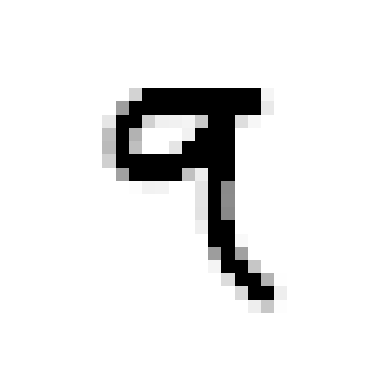

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
0: 0.069%
1: 0.014%
2: 0.033%
3: 7.184%
4: 0.003%
5: 0.930%
6: 0.006%
7: 0.072%
8: 1.580%
9: 90.110%

The predicted number is:  9


In [59]:
from PIL import Image
import numpy as np
import keras
import matplotlib.pyplot as plt
import os

loaded_model = keras.saving.load_model("NewSavedModel/model.keras")

# Load the image
image = Image.open("/Users/filipk/Downloads/import_img.png")
# Resize the image to 28x28
image_resized = image.resize((28, 28))
# Pick out the alpha channel to use
r, g, b, a = image_resized.split()
# a is NumPy array for manipulation
alpha_array = np.array(a)
#increase the color to 255 for image values over 120
alpha_array[alpha_array>120] = 255

gray_array = alpha_array.flatten() #Flatten to an array
# Plot the image
plt.imshow(alpha_array,"gray_r")
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

#Normalize value to 0-1
normalized_array = np.reshape(gray_array,(28,28,1))/255

prediction_img = np.expand_dims(normalized_array,axis=0)
#Make a prediction
prediction = loaded_model.predict(prediction_img)

for idx, value in enumerate(prediction[0]):
    print(f"{idx}: {value*100:.3f}%")

predicted_class = np.argmax(prediction, axis=1)
print("\nThe predicted number is: ", predicted_class[0])

os.remove("/Users/filipk/Downloads/import_img.png")